In [19]:
import openpyxl
import pandas as pd

## Load the birth data excel sheet

In [20]:
birth_data = pd.read_excel("BIRTH, Oyigbo data.xlsx", engine='openpyxl')

## Load The Delivery data excel sheet

In [21]:
xls = pd.ExcelFile("ANC AND DELIVERY DATA.xlsx", engine='openpyxl')
print(xls.sheet_names)

['Merger 3', 'ANCdata 2', 'BIRTHdata 2']


In [22]:
anc_data = pd.read_excel(xls, sheet_name="ANCdata 2")

## Get an overview of the data

In [23]:
birth_data.head()

,Date of Arrival,ID,Age,Booking Status,Parity,Date of Delivery,Mode of Delivery,Partograph Used,Outcome of Delivery,Birth Weight in Kg,Sex of Baby,Time of putting baby to breast,Was 4% Chlorhexidine gel applied to cord at birth?
0,2024-01-02,235/23,34.0,Booked,3.0,2024-01-02,Spontaneous Vertex Delivery (SVD),Yes,Live Birth,2.5,Female,NaN,NaN
1,2024-01-02,385/23,26.0,Booked,2.0,2024-01-02,Spontaneous Vertex Delivery (SVD),Yes,Live Birth,3.4,Female,NaN,NaN
2,2024-01-09,360/23,40.0,Booked,4.0,2024-01-09,Spontaneous Vertex Delivery (SVD),Yes,Live Birth,3.0,Male,NaN,NaN
3,2024-01-17,456/23,27.0,Booked,3.0,2024-01-17,Spontaneous Vertex Delivery (SVD),Yes,Live Birth,3.2,Female,NaN,NaN
4,2024-01-02,490/23,23.0,Booked,1.0,2024-01-03,Spontaneous Vertex Delivery (SVD),Yes,Live Birth,3.0,Male,NaN,NaN


In [24]:
birth_data.shape

(161, 13)

# Clean the birth dataset

## Rename The Columns so it has a suitable name that is ready for use

In [25]:
birth_data.columns = ['arrival_date', 'id', 'age', 'booking_status', 'parity', 'delivery_date', 'delivery_mode', 'partograph_used', 'delivery_outcome', 'birth_weight', 'baby_sex', 'breastfeeding_time', 'chlorhexidine_applied']

## Edit the columns data, replace nothing with Something valueable

In [26]:
birth_data.loc[(birth_data.partograph_used != "Yes"), "partograph_used"] = "No"
birth_data.loc[(birth_data.chlorhexidine_applied != "Yes"), "chlorhexidine_applied"] = "No"
birth_data.loc[(birth_data.breastfeeding_time != "Within 1 hour of Delivery"), "breastfeeding_time"] = "Not within 1 hour of Delivery"
birth_data.loc[(birth_data.birth_weight > 6), "birth_weight"] = birth_data.birth_weight.mean()

birth_data.fillna({"age": 30}, inplace=True)
birth_data.fillna({"delivery_outcome": "Still Birth"}, inplace=True)
birth_data.fillna({"booking_status": "Unbooked"}, inplace=True)
birth_data.fillna({"birth_weight": birth_data.birth_weight.mean()}, inplace=True)

## Sort the data in the dataframe by ID and overwrite the index

In [27]:
birth_data = birth_data.sort_values(by="id").reset_index(drop=True)

# Clean the ANC (Artenetal Care) data set

In [28]:
anc_data.head()

,ID,Age,Literacy status,Parity,Gravidity,Occupation,Husband's Occupation,Antenatal clinic attendance,Age of pregnancy (in weeks),Weight of patient (in Kg),...,Associated Problems,Associated Problems/Healthy,Associated Problems/Cough,Associated Problems/Pain,Associated Problems/Stable,Associated Problems/Weakness,Associated Problems/Catarrh,Associated Problems/Others,Associated Problems/Fever,"If others, specify"
0,037/24,25.0,Literate,0.0,1.0,NaN,Businessman,New (2024),10.0,64.0,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,Pre-bleeding
1,043/24,25.0,Literate,0.0,1.0,Hair dressing,Businessman,New (2024),21.0,63.0,...,Pain,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
2,052/24,24.0,Literate,1.0,3.0,NaN,Driver,New (2024),23.0,56.0,...,Pain,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
3,063/24,32.0,Literate,2.0,3.0,Teacher,Civil servant,New (2024),12.0,80.0,...,Pain Weakness,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN
4,105/24,36.0,Literate,3.0,4.0,NaN,Businessman,New (2024),17.0,95.0,...,Cough,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [29]:
anc_data.columns = [
    'id', 'age', 'literacy_status', 'parity', 'gravidity', 'occupation',
    'husband_occupation', 'antenatal_attendance', 'pregnancy_age_weeks',
    'weight_kg', 'systolic_bp', 'diastolic_bp', 'antenatal_visits_count',
    'delivery_status', 'delivery_location', 'hiv_status', 'vdrl_syphilis',
    'blood_group', 'elevated_glucose_during_pregnancy', 'hepatitis_b',
    'last_ipt_dose', 'tetanus_vaccine', 'associated_problems',
    'associated_problems_healthy', 'associated_problems_cough',
    'associated_problems_pain', 'associated_problems_stable',
    'associated_problems_weakness', 'associated_problems_catarrh',
    'associated_problems_others', 'associated_problems_fever',
    'others_specify'
]

In [30]:
# Merge the datasets on 'ID' column, keeping only the matching rows
anc_filtered = anc_data.merge(birth_data[['id']], on='id', how='inner')

In [31]:
anc_filtered.shape

(123, 32)

In [32]:
birth_data.shape

(161, 13)

# Time to answer tyhe questions given

## What is the total number of deliveries recorded in the time period?

In [33]:
birth_data.shape

(161, 13)

In [34]:
anc_filtered.shape

(123, 32)

In [35]:
anc_data.shape

(498, 32)

## Is there any difference in birth weight between booked and unbooked patients delivery?

In [36]:
ttest_data = birth_data.loc[:, ["booking_status", "birth_weight"]]

In [37]:
ttest_data.head()

,booking_status,birth_weight
0,Booked,3.6
1,Booked,3.0
2,Unbooked,3.0
3,Booked,4.0
4,Booked,3.3


In [38]:
booked_birth_weight = ttest_data.loc[(ttest_data.booking_status == "Booked")].birth_weight

unbooked_birth_weight =  ttest_data.loc[(ttest_data.booking_status == "Unbooked")].birth_weight

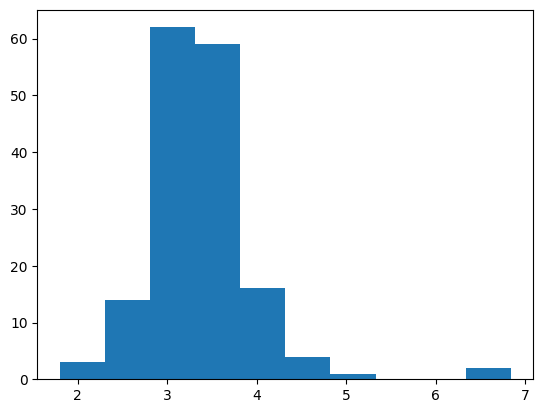

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for 'Weight' based on 'Booking Status'
plt.hist(ttest_data.birth_weight)
plt.show()

In [40]:
from scipy import stats

In [41]:
t_stat, p_value = stats.ttest_ind(booked_birth_weight, unbooked_birth_weight)

In [42]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -2.9569441422322744
P-value: 0.003580918021100134


In [43]:
booked_birth_weight.unique()

array([3.6       , 3.        , 4.        , 3.3       , 3.39368704,
       3.5       , 3.7       , 2.3       , 2.71      , 3.4       ,
       2.8       , 3.1       , 3.8       , 2.5       , 3.2       ,
       2.7       , 3.9       , 4.2       , 1.8       , 2.9       ,
       2.        , 6.83731034])

In [44]:
def get_trimester(age_weeks):
    if 0 <= age_weeks <= 12:
        return 'First Trimester'
    elif 13 <= age_weeks <= 26:
        return 'Second Trimester'
    elif age_weeks >= 27:
        return 'Third Trimester'


booking_trimester = anc_filtered.pregnancy_age_weeks.apply(get_trimester)

In [45]:
booking_trimester.head()

,pregnancy_age_weeks
0,First Trimester
1,First Trimester
2,First Trimester
3,Second Trimester
4,First Trimester


In [46]:
maternal_booking_weight = anc_filtered.weight_kg

In [47]:
maternal_booking_weight.head()

,weight_kg
0,NaN
1,60.0
2,58.0
3,60.0
4,63.0


In [52]:
birth_weight = birth_data.merge(anc_data[['id']], on='id', how='inner').birth_weight

In [49]:
maternal_booking_weight.fillna(maternal_booking_weight.mean())

,weight_kg
0,74.042017
1,60.000000
2,58.000000
3,60.000000
4,63.000000
...,...
118,63.000000
119,74.000000
120,65.000000
121,60.000000


In [50]:
booking_trimester.fillna("Second Trimester")

booking_trimester = booking_trimester.apply(lambda x: "Second Trimester" if x is None else x)

In [53]:
birth_weight.unique()

array([3.6       , 3.        , 4.        , 3.3       , 3.5       ,
       3.39368704, 3.4       , 3.7       , 3.2       , 2.5       ,
       6.83731034, 2.3       , 2.71      , 4.3       , 2.8       ,
       3.1       , 3.8       , 4.1       , 2.7       , 3.9       ,
       4.5       , 1.8       , 2.9       , 2.        , 4.9       ])

In [54]:
booking_trimester.unique()

array(['First Trimester', 'Second Trimester', 'Third Trimester'],
      dtype=object)

In [55]:
def get_weight_range(weight):
    if weight > 90:
        return 'Over Weight'
    else:
        return 'Normal Weight'


maternal_booking_weight = anc_filtered.weight_kg.apply(get_weight_range)

In [56]:
trimester_weight = booking_trimester + "_" + maternal_booking_weight

In [57]:
contingency_table = pd.crosstab(trimester_weight, delivery_outcome)

In [58]:
from scipy.stats import chi2_contingency

In [59]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [60]:
print("Contingency Table:")
print(contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

Contingency Table:
delivery_outcome                Live Birth  Still Birth
row_0                                                  
First Trimester_Normal Weight           18            0
First Trimester_Over Weight              3            0
Second Trimester_Normal Weight          67            6
Second Trimester_Over Weight             7            1
Third Trimester_Normal Weight           15            3
Third Trimester_Over Weight              3            0

Chi-square Statistic: 4.085399745423688
Degrees of Freedom: 5
P-value: 0.5371872145815226
